<div style="text-align: center; background-color: #111835; padding: 10px; border-radius: 10px;">
    <span style="color: white; font-size: 50px; font-weight: bold;">Sentiment Analysis Project</span>
</div>

This project focuses on classifying tweets based on their sentiment and emotions using Natural Language Processing (NLP) techniques. It utilizes a labeled dataset of tweets to train models that can automatically detect whether a tweet expresses a positive, negative, or neutral sentiment, as well as identify specific emotions. The aim is to explore how NLP can be applied to analyze social media content and extract meaningful emotional insights.

<div style="text-align: center; background-color: #2832C4; padding: 5px; border-radius: 10px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Dataset Overview</span>
</div>

The dataset, titled **"Sentiment & Emotions Labelled Tweets"**, contains approximately 25,000 manually labeled tweets. Each entry includes the following key fields:

* **Tweet ID:** Unique identifier for each tweet

* **Username:** Author of the tweet

* **Date and Time:** Timestamp of when the tweet was posted

* **Tweet Text:** The raw content of the tweet

* **Sentiment Label:** One of three categories — Positive, Negative, or Neutral

* **Emotion Label:** Specific emotion expressed in the tweet, such as joy, anger, fear, surprise, sadness, etc.

* **Sentiment Score:** A numerical score representing sentiment strength

* **Emotion Score:** A numerical score indicating the intensity of the emotion

The dataset is suitable for tasks like text classification, sentiment analysis, emotion detection, and social media trend analysis using NLP techniques.

<div style="text-align: center; background-color: #2832C4; padding: 5px; border-radius: 10px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Libraries & Loading Data</span>
</div>

In [2]:
#Data handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Text preprocessing
import re
import string
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

#Model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import joblib
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

2025-05-18 16:28:14.735018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747585694.913463      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747585694.963340      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/sentiment-and-emotions-of-tweets/sentiment-emotion-labelled_Dell_tweets.csv


In [3]:
df = pd.read_csv('/kaggle/input/sentiment-and-emotions-of-tweets/sentiment-emotion-labelled_Dell_tweets.csv')

<div style="text-align: center; background-color: #2832C4; padding: 5px; border-radius: 10px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Data Exploration</span>
</div>

In [4]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


In [5]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username', 'sentiment',
       'sentiment_score', 'emotion', 'emotion_score'],
      dtype='object')

In [6]:
df['sentiment'].value_counts()

sentiment
negative    10556
positive     7366
neutral      7048
Name: count, dtype: int64

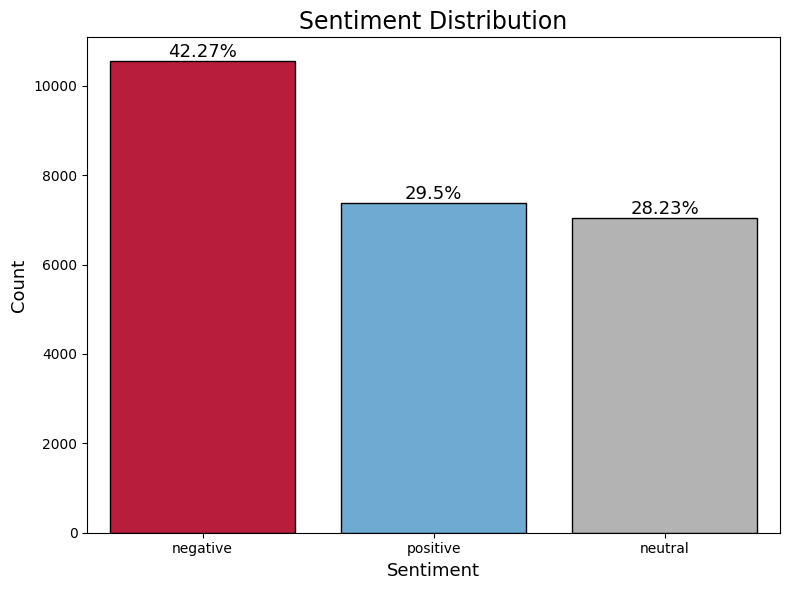

In [7]:
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

total = sentiment_counts['count'].sum()
sentiment_counts['percent'] = (sentiment_counts['count'] / total * 100).round(2)

custom_palette = {'negative': '#D2042D', 'positive': '#5DADE2', 'neutral': '#B3B3B3'}

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=sentiment_counts,
    x='sentiment',
    y='count',
    palette=custom_palette,
    edgecolor='black',
    linewidth=1
)

for i, row in sentiment_counts.iterrows():
    ax.text(i, row['count'] + 3, f"{row['percent']}%", 
            ha='center', va='bottom', fontsize=13, color='black')

plt.title('Sentiment Distribution', fontsize=17)
plt.xlabel('Sentiment', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

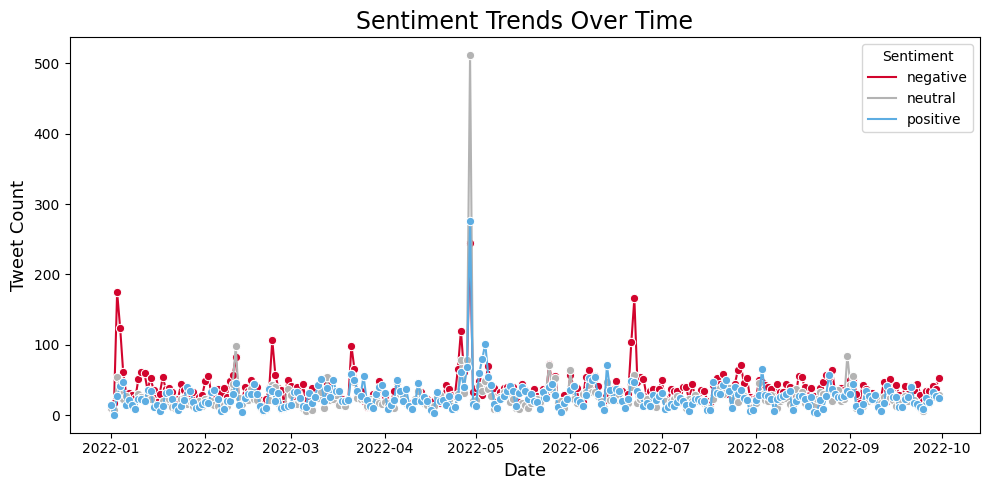

In [8]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
sentiment_over_time = df.groupby([df['Datetime'].dt.date, 'sentiment']).size().reset_index(name='count')
sentiment_over_time.columns = ['Date', 'Sentiment', 'Count']
custom_palette = {'negative': '#D2042D', 'positive': '#5DADE2', 'neutral': '#B3B3B3'}

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=sentiment_over_time,
    x='Date',
    y='Count',
    hue='Sentiment',
    palette=custom_palette,
    marker='o'
)

plt.title('Sentiment Trends Over Time', fontsize=17)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Tweet Count', fontsize=13)
plt.legend(title='Sentiment')
plt.xticks()
plt.tight_layout()
plt.show()


<div style="text-align: center; background-color: #2832C4; padding: 5px; border-radius: 10px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Text Preprocessing</span>
</div>

In [9]:
df.drop(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Username', 'sentiment_score', 'emotion', 'emotion_score'], axis=1, inplace=True)

In [10]:
#Text cleaning
def basic_clean(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)       #remove URLs
    text = re.sub(r'@\w+', '', text)          #remove mentions
    text = re.sub(r'#', '', text)             #remove hashtags symbol (keep the word)
    return text.strip()

df['clean_text'] = df['Text'].apply(basic_clean)

In [11]:
#Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [12]:
#Use BERT as text feature extractor
texts = df['clean_text'].tolist()
X_bert = []

for text in tqdm(texts):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding='max_length', max_length=128)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    cls_embedding = outputs.last_hidden_state[0][0].numpy()  
    X_bert.append(cls_embedding)

X = np.array(X_bert)

100%|██████████| 24970/24970 [55:06<00:00,  7.55it/s] 


In [13]:
tokenizer.save_pretrained('BERT_tokenizer')

('BERT_tokenizer/tokenizer_config.json',
 'BERT_tokenizer/special_tokens_map.json',
 'BERT_tokenizer/vocab.txt',
 'BERT_tokenizer/added_tokens.json')

In [14]:
df.drop('Text', axis=1, inplace=True)

In [15]:
#Encoding the target
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

In [16]:
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [17]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="text-align: center; background-color: #2832C4; padding: 5px; border-radius: 10px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Model Development</span>
</div>

<div style="text-align: left; padding: 20px;">
    <span style="color: #2832C4; font-size: 25px; font-weight: bold;">Machine Learning Models
</span>
</div>

In [18]:
def evaluate_model(name, model, param_grid, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    print(f'\n{"="*30}\n Evaluating {name}\n{"="*30}')

    #Grid Search
    grid = GridSearchCV(model, param_grid, cv=3, scoring='f1_weighted')
    grid.fit(X_train, y_train)

    #Best model & prediction
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    #Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Best Parameters: {grid.best_params_}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = np.unique(y_test)

    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    #Normalized Confusion Matrix
    cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{name} - Normalized Confusion Matrix')
    plt.show()

In [20]:
log_params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

results = evaluate_model(
    name='Logistic Regression',
    model=LogisticRegression(max_iter=1000),
    param_grid=log_params
)


 Evaluating Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KeyboardInterrupt: 


 Evaluating K-Nearest Neighbors
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy:  0.7271
Precision: 0.7250
Recall:    0.7271
F1 Score:  0.7195

 Classification Report:
              precision    recall  f1-score   support

           0     0.7453    0.8586    0.7979      2065
           1     0.7120    0.5136    0.5968      1468
           2     0.7095    0.7556    0.7319      1461

    accuracy                         0.7271      4994
   macro avg     0.7223    0.7093    0.7088      4994
weighted avg     0.7250    0.7271    0.7195      4994



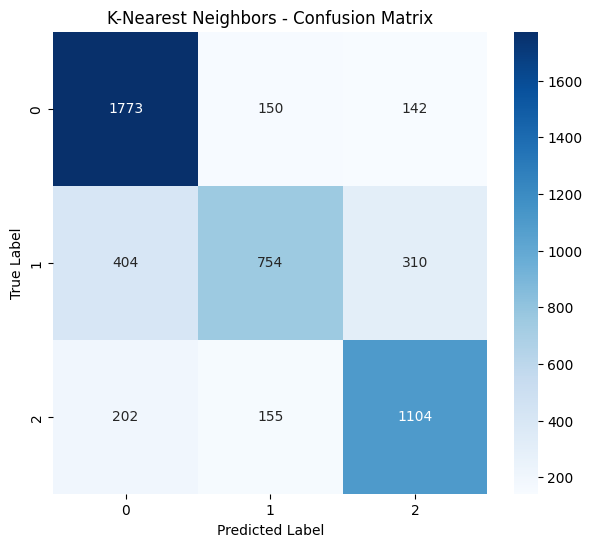

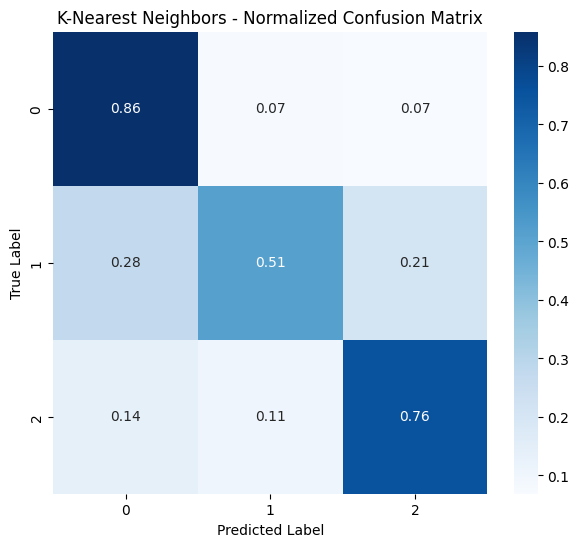

In [21]:
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

evaluate_model(
    name='K-Nearest Neighbors',
    model=KNeighborsClassifier(),
    param_grid=knn_params
)


 Evaluating Decision Tree
Best Parameters: {'max_depth': 10, 'min_samples_split': 5}
Accuracy:  0.6284
Precision: 0.6249
Recall:    0.6284
F1 Score:  0.6258

 Classification Report:
              precision    recall  f1-score   support

           0     0.6945    0.7540    0.7230      2065
           1     0.5092    0.4884    0.4986      1468
           2     0.6429    0.5914    0.6160      1461

    accuracy                         0.6284      4994
   macro avg     0.6155    0.6113    0.6126      4994
weighted avg     0.6249    0.6284    0.6258      4994



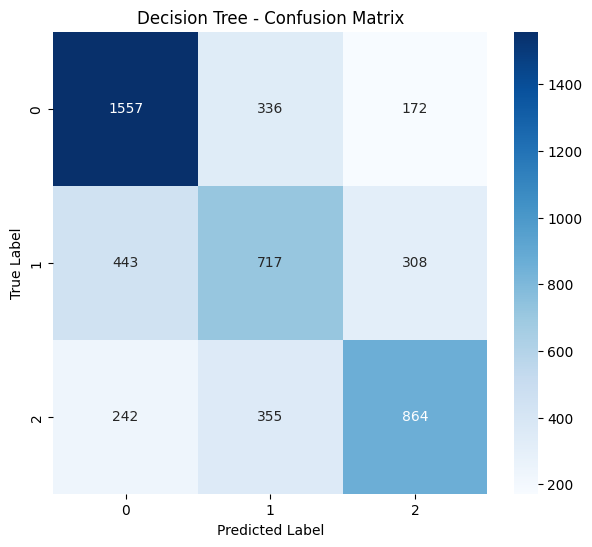

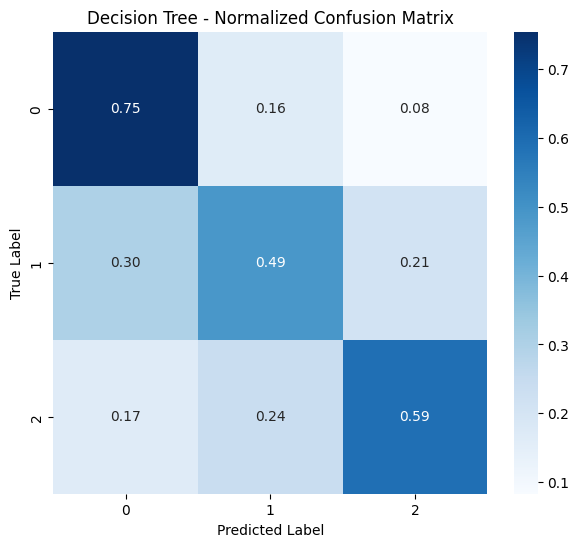

In [22]:
dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

evaluate_model(
    name='Decision Tree',
    model=DecisionTreeClassifier(),
    param_grid=dt_params
)


 Evaluating Random Forest
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy:  0.7575
Precision: 0.7572
Recall:    0.7575
F1 Score:  0.7519

 Classification Report:
              precision    recall  f1-score   support

           0     0.7517    0.9002    0.8193      2065
           1     0.7290    0.5865    0.6501      1468
           2     0.7933    0.7276    0.7590      1461

    accuracy                         0.7575      4994
   macro avg     0.7580    0.7381    0.7428      4994
weighted avg     0.7572    0.7575    0.7519      4994



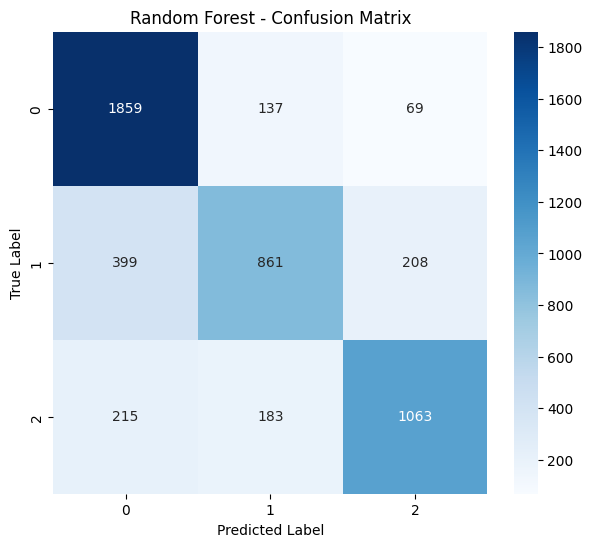

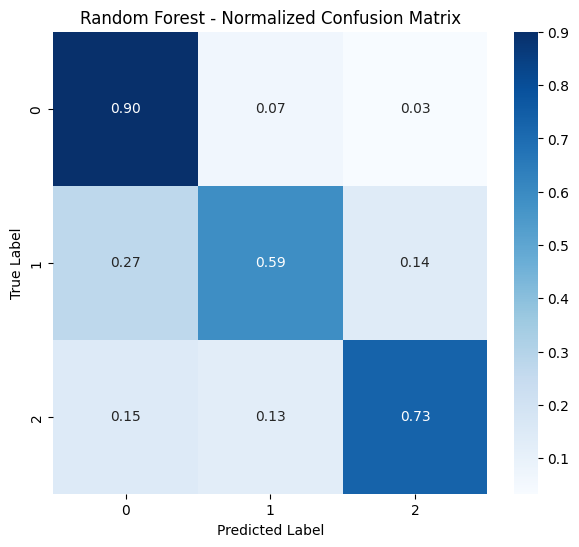

In [23]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

evaluate_model(
    name='Random Forest',
    model=RandomForestClassifier(),
    param_grid=rf_params
)


 Evaluating XGBoost
Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500}
Accuracy:  0.8064
Precision: 0.8044
Recall:    0.8064
F1 Score:  0.8049

 Classification Report:
              precision    recall  f1-score   support

           0     0.8436    0.8881    0.8653      2065
           1     0.7427    0.6962    0.7187      1468
           2     0.8109    0.8015    0.8062      1461

    accuracy                         0.8064      4994
   macro avg     0.7991    0.7953    0.7967      4994
weighted avg     0.8044    0.8064    0.8049      4994



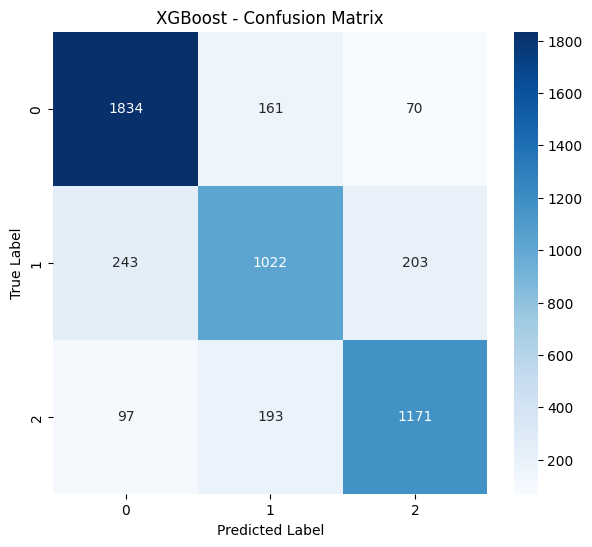

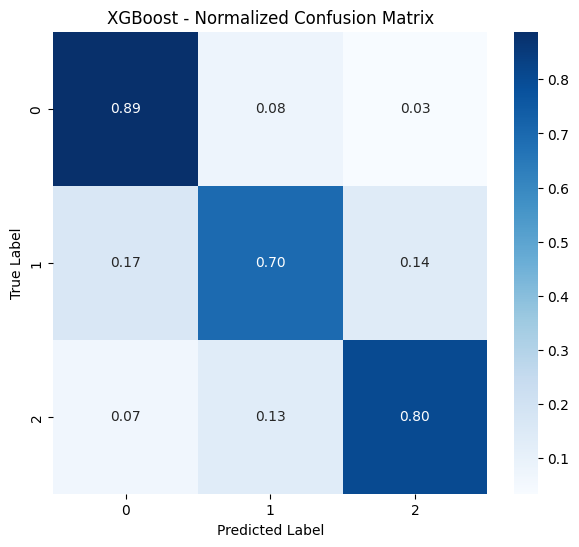

In [24]:
xgb_params = {
    'n_estimators': [300, 500],
    'max_depth': [5, 7],
    'learning_rate': [0.3, 0.5]
}

evaluate_model(
    name='XGBoost',
    model=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_grid=xgb_params
)

<div style="text-align: left; padding: 20px;">
    <span style="color: #2832C4; font-size: 25px; font-weight: bold;">Ensemble Learning - Voting 
</span>
</div>


 Evaluating Voting Ensemble
Accuracy:  0.8146
Precision: 0.8124
Recall:    0.8146
F1 Score:  0.8127

 Classification Report:
              precision    recall  f1-score   support

           0     0.8436    0.8983    0.8701      2065
           1     0.7595    0.6948    0.7257      1468
           2     0.8216    0.8166    0.8191      1461

    accuracy                         0.8146      4994
   macro avg     0.8082    0.8032    0.8050      4994
weighted avg     0.8124    0.8146    0.8127      4994



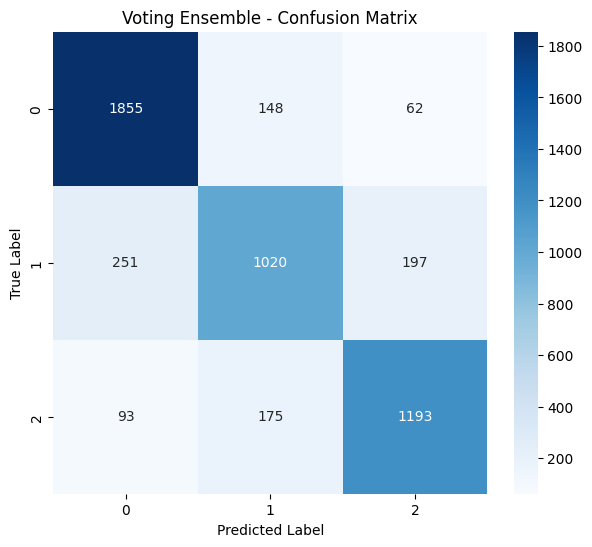

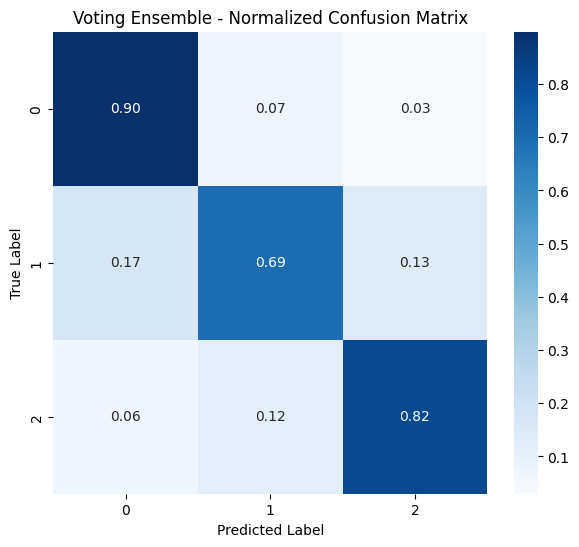

In [26]:
print(f"\n{'='*30}\n Evaluating Voting Ensemble\n{'='*30}")

#Best models
log_model = LogisticRegression(C=1, solver='liblinear')
rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=5, random_state=42)
xgb_model = XGBClassifier(n_estimators=500, max_depth=7, learning_rate=0.3,
                          use_label_encoder=False, eval_metric='mlogloss', random_state=42)

#Ensemble model
voting_model = VotingClassifier(
    estimators=[
        ('Logistic', log_model),
        ('RandomForest', rf_model),
        ('XGBoost', xgb_model)
    ],
    voting='soft'  
)

voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)

#Metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

#Confusion Matrix
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Voting Ensemble - Confusion Matrix')
plt.show()

#Normalized Confusion Matrix
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(7, 6))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Voting Ensemble - Normalized Confusion Matrix')
plt.show()


<div style="text-align: left; padding: 20px;">
    <span style="color: #2832C4; font-size: 25px; font-weight: bold;">Ensemble Learning - Stacking (Best Model)
</span>
</div>


 Evaluating Stacking Ensemble 
Accuracy:  0.8148
Precision: 0.8131
Recall:    0.8148
F1 Score:  0.8137

 Classification Report:
              precision    recall  f1-score   support

           0     0.8562    0.8852    0.8705      2065
           1     0.7466    0.7064    0.7259      1468
           2     0.8190    0.8241    0.8216      1461

    accuracy                         0.8148      4994
   macro avg     0.8073    0.8052    0.8060      4994
weighted avg     0.8131    0.8148    0.8137      4994



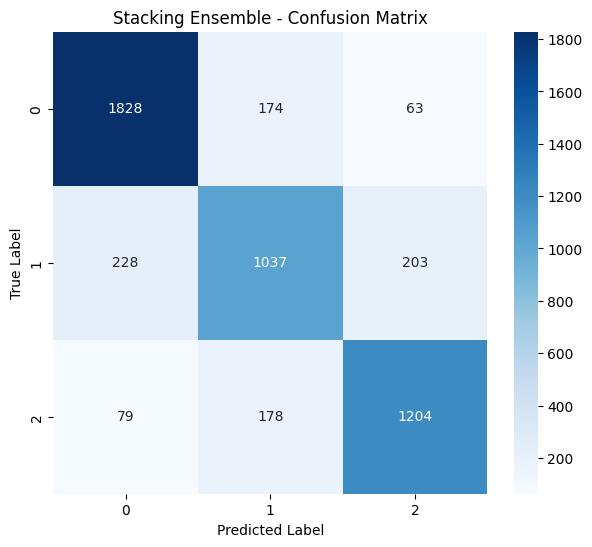

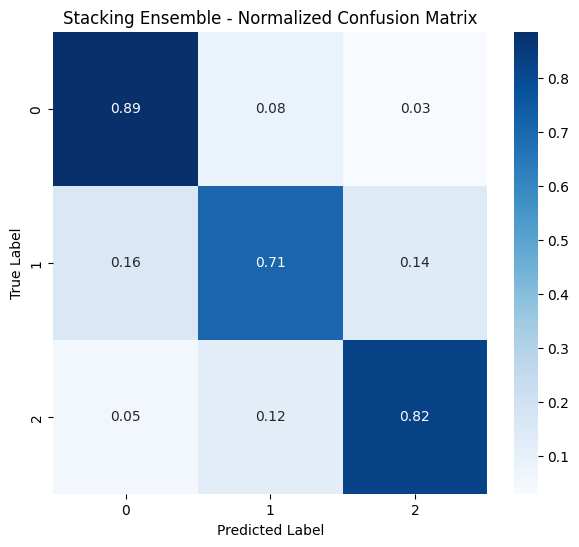

In [25]:
print(f"\n{'='*30}\n Evaluating Stacking Ensemble \n{'='*30}")

#Base models
log_model = LogisticRegression(C=1, solver='liblinear')
rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=5, random_state=42)
xgb_model = XGBClassifier(n_estimators=500, max_depth=7, learning_rate=0.3,
                          use_label_encoder=False, eval_metric='mlogloss', random_state=42)

#Final estimator (meta model)
final_estimator = LogisticRegression()

#Ensemble model
stacking_model = StackingClassifier(
    estimators=[
        ('Logistic', log_model),
        ('RandomForest', rf_model),
        ('XGBoost', xgb_model)
    ],
    final_estimator=final_estimator,
    cv=5
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

#Metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

#Confusion Matrix
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Stacking Ensemble - Confusion Matrix')
plt.show()

#Normalized Confusion Matrix
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(7, 6))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Stacking Ensemble - Normalized Confusion Matrix')
plt.show()

In [27]:
#Save the best model
joblib.dump(stacking_model, 'stacking_ensemble_model.pkl')

['stacking_ensemble_model.pkl']